Here’s an example of a simple linear regression scenario related to air pollution:

**Scenario:**
You want to study the relationship between the number of vehicles on the road and the level of air pollution (measured in PM2.5 concentration). You collect real-world data from a city over several days.

**Table of Data:**

| Number of Vehicles (in thousands) | PM2.5 Concentration (µg/m³) |
|-----------------------------------|-----------------------------|
| 10                                | 25                          |
| 20                                | 40                          |
| 30                                | 55                          |
| 40                                | 70                          |
| 50                                | 85                          |

**Objective:**
Using this data, you aim to build a simple linear regression model to predict PM2.5 concentration based on the number of vehicles on the road.

Number of Vehicles: [10, 20, 30, 40, 50]
PM2.5 Concentration: [26.685645870185144, 48.98759898228247, 62.640572250244304, 67.27795818441584, 64.62219306009305]


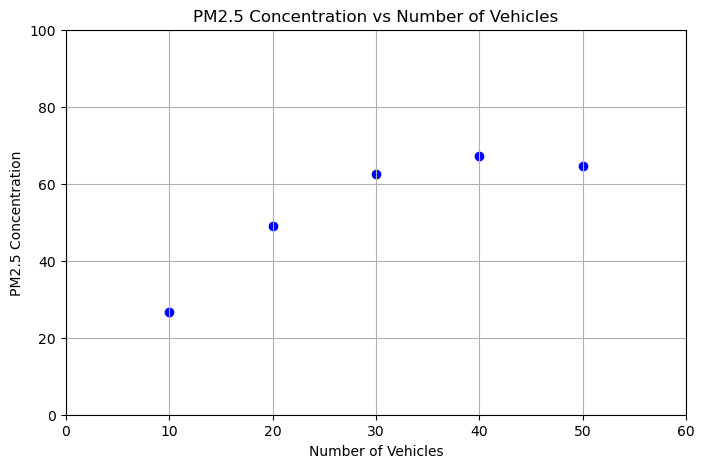

In [1]:
import matplotlib.pyplot as plt

# Initialize the data
vehicles = [10, 20, 30, 40, 50]
pm25 = [25, 40, 55, 70, 85]

#add some noise to the data
import numpy as np
noise = np.random.normal(0, 15, len(pm25))
pm25 = [p + n for p, n in zip(pm25, noise)]
# Print the data
print("Number of Vehicles:", vehicles)
print("PM2.5 Concentration:", pm25)

# Visualize the data , using a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(vehicles, pm25, marker='o', color='blue')
plt.xlabel('Number of Vehicles')    
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Concentration vs Number of Vehicles')
plt.xlim(0, 60)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape the data for sklearn
X = np.array(vehicles).reshape(-1, 1)
y = np.array(pm25)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 25.793757594859407
Coefficient: 0.941634535819492


visualize the fitted model

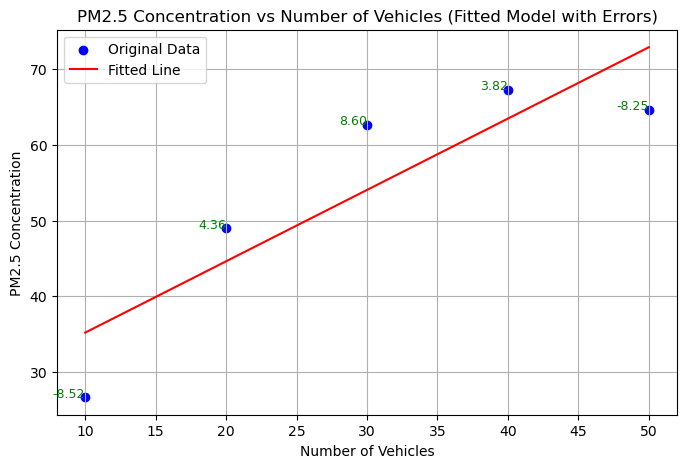

In [5]:
# Generate predictions using the fitted model
y_pred = model.predict(X)

# Calculate the error at each data point
errors = y - y_pred

# Plot the original data points
plt.figure(figsize=(8, 5))
plt.scatter(vehicles, pm25, marker='o', color='blue', label='Original Data')

# Plot the regression line
plt.plot(vehicles, y_pred, color='red', label='Fitted Line')

# Annotate the error at each data point
for i, (x, y, e) in enumerate(zip(vehicles, pm25, errors)):
    plt.text(x, y, f"{e:.2f}", fontsize=9, color='green', ha='right')

# Add labels, title, and legend
plt.xlabel('Number of Vehicles')
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Concentration vs Number of Vehicles (Fitted Model with Errors)')
plt.legend()
plt.grid(True)
plt.show()

compute ssr , rss and r2 of the model to evaluate the performance of the model

In [4]:
# Generate predictions using the fitted model
y_pred = model.predict(X)

# Calculate SSR (Sum of Squares due to Regression)
y_mean = np.mean(y)
ssr = np.sum((y_pred - y_mean) ** 2)

# Calculate RSS (Residual Sum of Squares)
rss = np.sum((y - y_pred) ** 2)

# Calculate TSS (Total Sum of Squares)
tss = np.sum((y - y_mean) ** 2)

# Calculate R² (Coefficient of Determination)
r2 = ssr / tss

# Print the results
print(f"SSR (Sum of Squares due to Regression): {ssr}")
print(f"RSS (Residual Sum of Squares): {rss}")
print(f"R² (Coefficient of Determination): {r2}")

SSR (Sum of Squares due to Regression): 886.6755990479897
RSS (Residual Sum of Squares): 248.30799771731364
R² (Coefficient of Determination): 0.7812232719265809
